In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [22]:
company = input("Enter a comapny name : ")
path = "D:\\Downloads\\BhavCopyJulyForML\\"+company+".csv"
print (path)

Enter a comapny name : SBIN
D:\Downloads\BhavCopyJulyForML\SBIN.csv


In [23]:
df = pd.read_csv(path)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2013,240.490005,243.404999,239.755005,242.645004,221.025604,17202300
1,02-01-2013,245.000000,246.399994,243.815002,245.054993,223.220871,14660120
2,03-01-2013,246.000000,248.240005,243.619995,247.160004,225.138336,20103090
3,04-01-2013,246.000000,249.294998,245.065002,248.669998,226.513794,13705950
4,07-01-2013,249.000000,249.899994,246.175003,246.759995,224.773972,10264490


In [6]:
df.dtypes
df['Date']=pd.to_datetime(df.Date,format='mixed')
df.shape

(1299, 7)

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,240.490005,243.404999,239.755005,242.645004,221.025604,17202300
1,2013-02-01,245.000000,246.399994,243.815002,245.054993,223.220871,14660120
2,2013-03-01,246.000000,248.240005,243.619995,247.160004,225.138336,20103090
3,2013-04-01,246.000000,249.294998,245.065002,248.669998,226.513794,13705950
4,2013-07-01,249.000000,249.899994,246.175003,246.759995,224.773972,10264490


In [8]:
df.drop('Adj Close',axis=1,inplace=True)
df['Volume']=df['Volume'].astype(float)
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

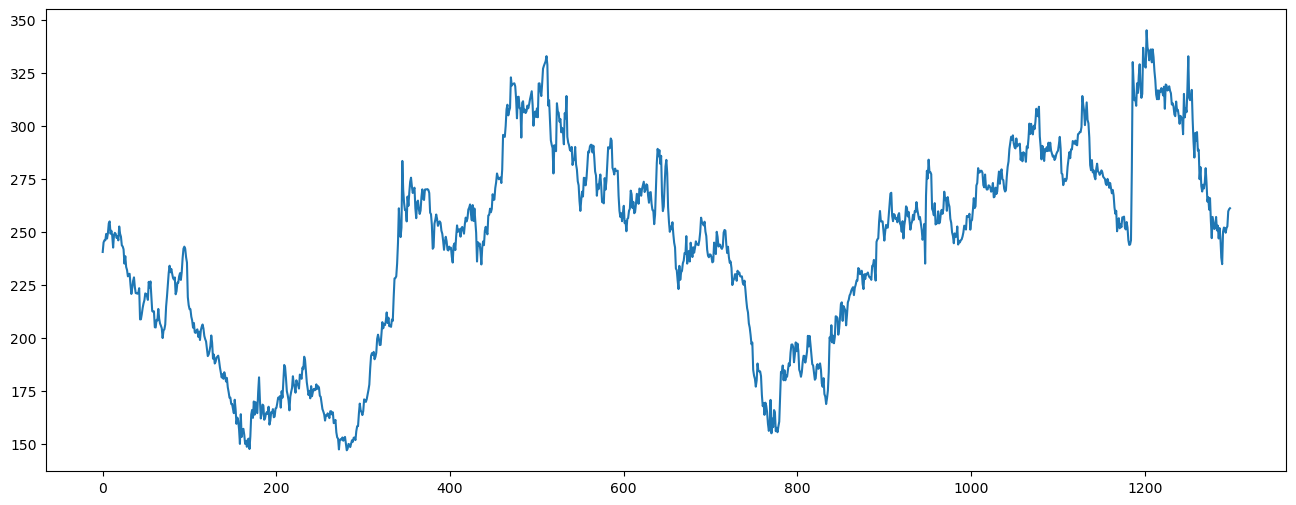

In [11]:
df.isnull().sum()
df.isna().any()
df_new = df[np.isfinite(df).all(1)]

df_new['Open'].plot(figsize=(16,6))

x=df_new[['Open','High','Low','Volume']] #Multiple Linear Regression  4 independent variables
y=df_new['Close'] #dependent variable

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  confusion_matrix,accuracy_score
regressor=LinearRegression()

In [14]:
regressor.fit(x_train,y_train)

print(regressor.coef_)

print(regressor.intercept_)

[-7.05309335e-01  8.79097860e-01  8.24351605e-01 -8.82601700e-09]
0.3898636523621519


In [15]:
predicted=regressor.predict(x_test)
print(predicted)


[272.66462487 271.62850884 172.92109425 257.46202865 161.15565361
 287.36426098 248.98947604 200.10043587 274.6642515  176.30015538
 252.83581502 252.45148064 226.8813218  258.46248119 254.83773469
 218.63575137 166.76263924 241.64108814 253.58293096 241.68612077
 307.73483735 272.11159759 245.53918984 272.65764576 219.25329726
 263.37041751 226.03370505 247.92429849 303.70543604 242.4293678
 254.34531673 238.71658307 315.04535198 167.81532426 182.17050873
 249.72400546 263.61843873 155.11027481 240.92193224 307.60158289
 166.44474085 246.30211099 310.68297711 179.6608472  196.62852731
 255.47380946 319.50235672 245.22449708 307.10719881 223.70241466
 173.19419786 257.51065621 272.56488042 255.55997101 254.17846263
 266.73625468 248.84640989 311.90545048 253.02739369 277.56294544
 210.87988498 309.67244074 279.16972377 331.37377345 205.21191562
 221.55373423 246.42264672 205.08342306 285.75668682 255.75727937
 239.91654574 337.47756727 201.00825058 305.11512689 250.55084514
 247.215988

In [16]:
#dframe=pd.DataFrame(y_test,predicted)
#dframe.shape
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})


In [17]:
print(dfr)

          Actual   Predicted
579   274.299988  272.664625
1013  271.649994  271.628509
759   169.399994  172.921094
446   257.524994  257.462029
186   161.490005  161.155654
...          ...         ...
638   288.600006  283.630481
440   252.354996  252.688545
737   224.449997  224.737590
878   229.250000  229.634642
82    229.945007  231.035088

[325 rows x 2 columns]


In [18]:
dfr.sort_values("Actual",ascending=False)
dfr.sort_values("Predicted",ascending=False)

,Actual,Predicted
1198,331.049988,337.477567
1186,320.500000,337.200873
1203,333.000000,331.965171
1199,329.100006,331.373773
1197,333.549988,330.196444
...,...,...
159,154.800003,155.110275
270,152.384995,152.343541
269,151.660004,151.973978
276,151.410004,151.367254


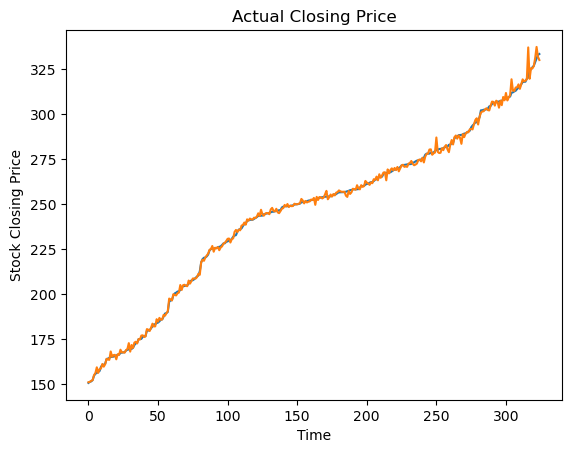

In [19]:
lst=[i for i in range(0,len(dfr.Actual))]
ak=dfr.head(len(dfr.Actual))
aka=ak.sort_values("Actual")

#print(ak)
plt.plot(lst,aka)
plt.xlabel("Time")
plt.ylabel("Stock Closing Price")
plt.title("Actual Closing Price")
#plt.plot(lst,aak,color="Blue")
#df_new['Close'].plot(figsize=(16,6))
plt.show()

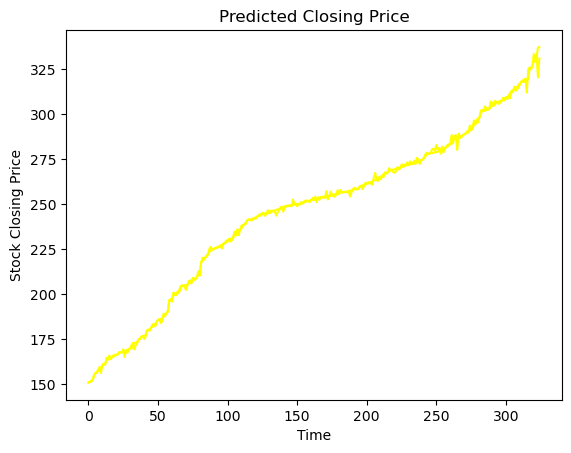

In [20]:
lst=[i for i in range(0,len(dfr.Actual))]
aak=ak.sort_values("Predicted")
plt.plot(lst,aak,color="Yellow")
plt.xlabel("Time")
plt.ylabel("Stock Closing Price")
plt.title("Predicted Closing Price")
plt.show()


In [21]:
regressor.score(x_test,y_test)


0.9986014740807813